In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('WALMART_SALES_DATA.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Basic Statistics tasks
1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

Statistical Model
For Store 1 – Build prediction models to forecast demand (Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.) Change dates into days by creating new variable.
Select the model which gives best accuracy.

In [34]:
data.shape

(6435, 8)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [36]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [37]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### 1) Which store has maximum sales?

In [38]:
store_sales=data.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False)
store_sales.round().head(1)

Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

In [39]:
store_sale=data.groupby('Store').sum().sort_values('Weekly_Sales',ascending=False)
store_sale=store_sale.round()
store_sale.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301397792.0,10,7930.0,489.0,29892.0,1054.0
4,299543953.0,10,8902.0,460.0,18401.0,853.0
14,288999911.0,10,8264.0,489.0,26639.0,1237.0
13,286517704.0,10,7679.0,470.0,18401.0,1001.0
2,275382441.0,10,9755.0,460.0,30837.0,1090.0


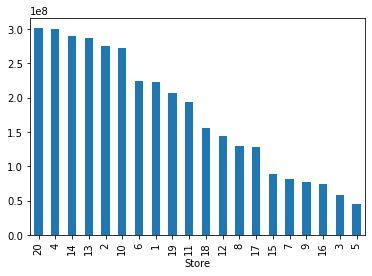

<Figure size 2880x1440 with 0 Axes>

In [185]:
store_sale.groupby('Store')['Weekly_Sales'].sum().head(20).sort_values(ascending=False).plot(kind='bar')
plt.figure(figsize=(40,20));

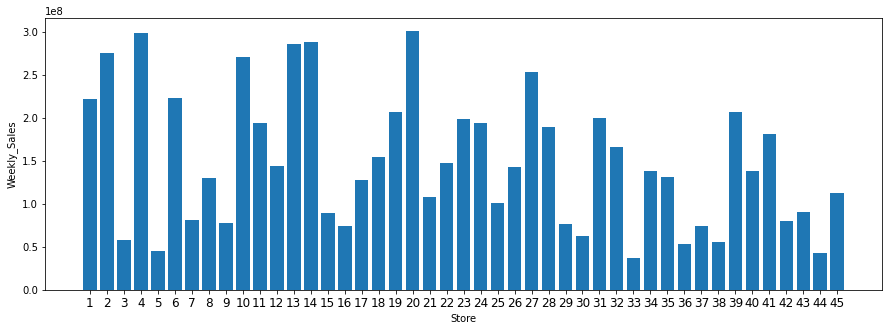

In [40]:
#stores=range(1,46)

stores=[i for i,j in data.groupby('Store')]
plt.figure(figsize=(15,5))
plt.bar(stores,data.groupby('Store').sum()['Weekly_Sales'].round())
plt.xticks(stores,size=12)
plt.ylabel('Weekly_Sales')
plt.xlabel('Store')

plt.show()

#### The results shows the store 20 having maximum sales-Amount=301397792.

#### 2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [41]:
## Calculating Maximum standard deviation
d1=data.groupby('Store').std()['Weekly_Sales'].sort_values(ascending=False).head().round(2)
d1

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
Name: Weekly_Sales, dtype: float64

In [42]:
## Calculating Coefficient of mean to standard deviation (CV)
#CV is a way to measure how spread out values are in a dataset relative to the mean.
d2=data.groupby('Store').std()['Weekly_Sales']/data.groupby('Store').mean()['Weekly_Sales']
d2.sort_values(ascending=False).head(10)*100

Store
35    22.968111
7     19.730469
15    19.338399
29    18.374247
23    17.972115
21    17.029239
45    16.561273
16    16.518065
18    16.284550
36    16.257891
Name: Weekly_Sales, dtype: float64

As per the analysis it has been found out that the store 14 
has maximum standard deviation and store 35 has maximum coeffient of variation.

#### 3) Which store/s has good quarterly growth rate in Q3’2012

In [43]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [44]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
#data['Month'].astype(int)
data.head(5)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [45]:
"""Q1=[1,2,3]
Q2=[4,5,6]
Q3=[7,8,9]
for i in data['Month']:
    if i in Q1:
        data['Quarter']='Q1'
    elif i in Q2:
        data['Quarter']='Q2'
    elif i in Q3:
        data['Quarter']='Q3'
    else:
        data['Quarter']='Q4'"""
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [46]:
Q3_Store_sales=data[(data['Month'].isin([7,8,9])) & (data['Year']==2012)]
Q3_Store_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908,2012,7
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908,2012,8
...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684,2012,9
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9


In [47]:
Q3_Store_sale=Q3_Store_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
Q3_Store_sale.head(5)

Store
4     27796792.46
20    26891526.98
13    26421259.30
2     24303354.86
10    23037258.76
Name: Weekly_Sales, dtype: float64

In [48]:
Q3_Store_sales=Q3_Store_sales.groupby('Store').sum()
Q3_Store_sales.head(5)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Store,,,,,,,,
1,20253947.78,1,1040.81,45.775,2888.890624,89.804,26156,104
2,24303354.86,1,1071.15,45.775,2884.164864,85.345,26156,104
3,5298005.47,1,1073.28,45.775,2934.649649,82.342,26156,104
4,27796792.46,1,1009.14,45.490,1700.795569,53.001,26156,104
5,4163790.99,1,1066.70,45.775,2896.556440,72.839,26156,104


Text(0, 0.5, 'Weekly_Sales')

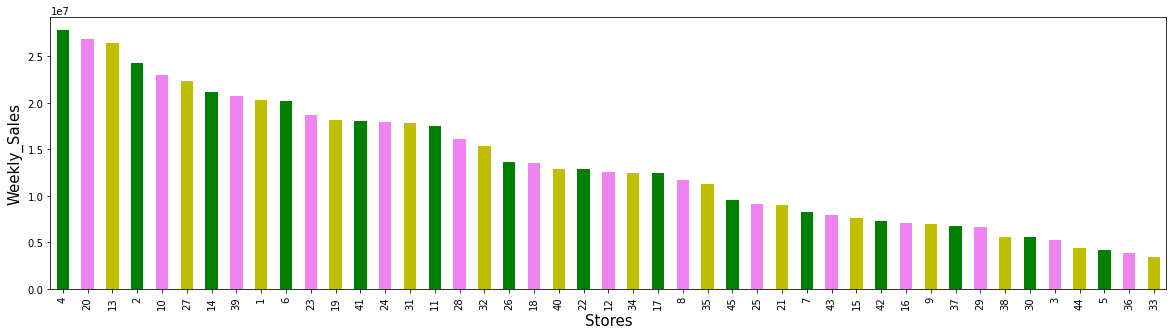

In [141]:
plt.figure(figsize=(20,5))
Q3_Store_sales['Weekly_Sales'].sort_values(ascending=False).plot(kind='bar',color=['g','violet','y'])
plt.xlabel('Stores',size=15)
plt.ylabel('Weekly_Sales',size=15)

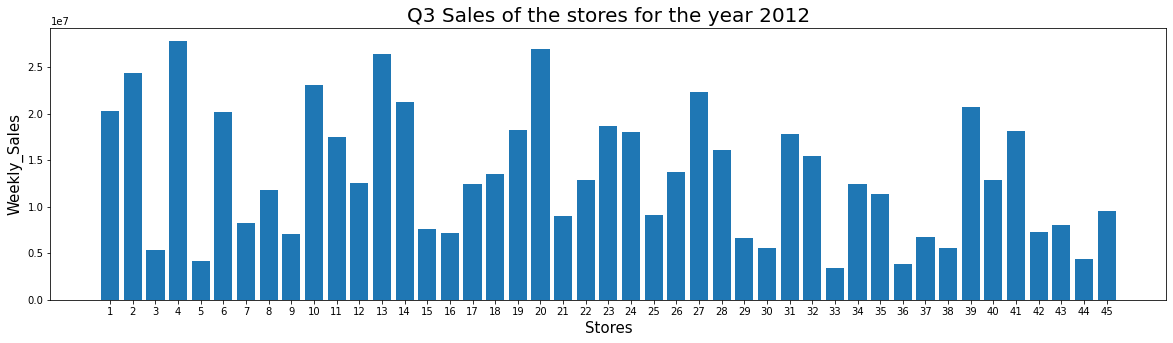

In [49]:
stores=[i for i,j in Q3_Store_sales.groupby('Store')]
plt.figure(figsize=(20,5))
plt.xticks(stores)
plt.title('Q3 Sales of the stores for the year 2012',size=20)
plt.bar(stores,Q3_Store_sales['Weekly_Sales'])
plt.xlabel('Stores',size=15)
plt.ylabel('Weekly_Sales',size=15)

plt.show()

#### Ans:- Data shows that in Quarter 3(Year 2012) store no.4 has good quarterly growth.

### 4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [50]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [51]:
super_bowl=data[data['Date'].isin(['2010-02-12','2011-02-11','2012-02-10','2013-02-08'])]
Labour_Day=data[data['Date'].isin(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'])]
Thanksgiving_Day=data[data['Date'].isin(['2010-11-26','2011-11-25','2012-11-23','2013-11-29'])]
Christmas_day=data[data['Date'].isin(['2010-12-31','2011-12-30','2012-12-28','2013-11-27'])]
Working_day=data[data['Holiday_Flag']==0]


In [52]:
super_bowl_Avg=super_bowl['Weekly_Sales'].mean()
Labour_Day_Avg=Labour_Day['Weekly_Sales'].mean()
Thanksgiving_Avg=Thanksgiving_Day['Weekly_Sales'].mean()
Christmas_day_Avg=Christmas_day['Weekly_Sales'].mean()
Working_day_Avg=Working_day['Weekly_Sales'].mean()

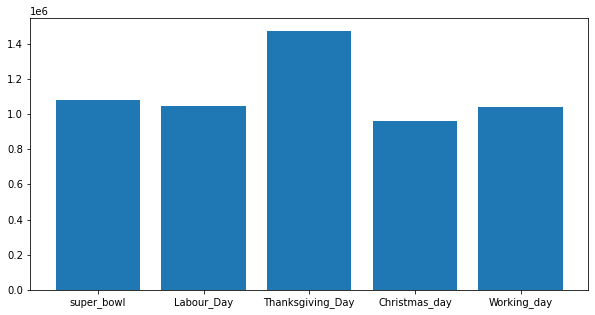

In [53]:
plt.figure(figsize=(10,5))
days=['super_bowl','Labour_Day','Thanksgiving_Day','Christmas_day','Working_day']
Avg_sales=[super_bowl_Avg,Labour_Day_Avg,Thanksgiving_Avg,Christmas_day_Avg,Working_day_Avg]
plt.bar(days,Avg_sales)

plt.show()

#### 5) Provide a monthly and semester view of sales in units and give insights

In [54]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [63]:
data['Year'].unique()

array([2010, 2011, 2012], dtype=int64)

In [65]:
#data.groupby(['Year','Month'])['Weekly_Sales'].sum().round()
sales_2010=data.loc[data['Year']==2010]
sales_2011=data.loc[data['Year']==2011]
sales_2012=data.loc[data['Year']==2012]

In [78]:
sales_Months_2010=sales_2010.groupby('Month')['Weekly_Sales'].sum().round().sort_values(ascending=False)
sales_Months_2011=sales_2011.groupby('Month')['Weekly_Sales'].sum().round().sort_values(ascending=False)
sales_Months_2012=sales_2012.groupby('Month')['Weekly_Sales'].sum().round().sort_values(ascending=False)

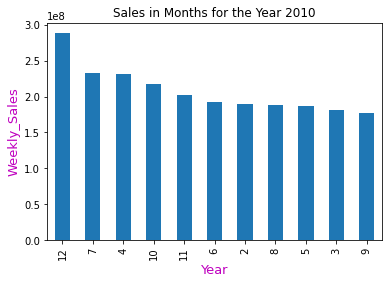

In [144]:
sales_Months_2010.plot(kind='bar')
plt.title('Sales in Months for the Year 2010',size=12)
plt.xlabel('Year',size=13,color='m')
plt.ylabel('Weekly_Sales',size=13,color='m');

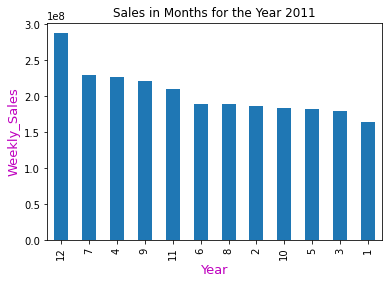

In [145]:
sales_Months_2011.plot(kind='bar')
plt.title('Sales in Months for the Year 2011',size=12)
plt.xlabel('Year',size=13,color='m')
plt.ylabel('Weekly_Sales',size=13,color='m');

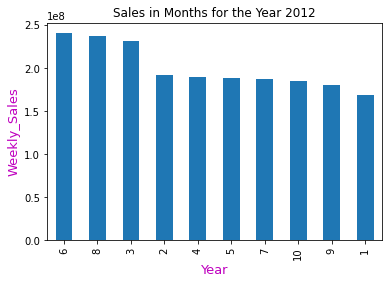

In [146]:
sales_Months_2012.plot(kind='bar')
plt.title('Sales in Months for the Year 2012',size=12)
plt.xlabel('Year',size=13,color='m')
plt.ylabel('Weekly_Sales',size=13,color='m');

In [104]:
sales_Year=data.groupby(['Year'],as_index=False)['Weekly_Sales'].sum().sort_values(by='Year',ascending=False).round()
sales_Year

,Year,Weekly_Sales
2,2012,2.000133e+09
1,2011,2.448200e+09
0,2010,2.288886e+09


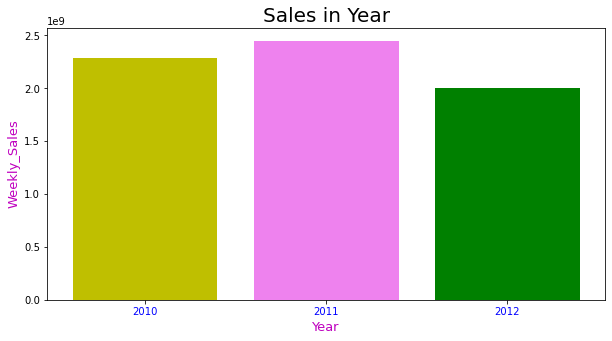

In [133]:
plt.figure(figsize=(10,5))
#sales_Year.plot(kind='bar')
plt.bar(sales_Year['Year'],sales_Year['Weekly_Sales'],color=['g','violet','y'])
plt.xticks(sales_Year['Year'],color='b')
plt.title('Sales in Year',size=20)
plt.xlabel('Year',size=13,color='m')
plt.ylabel('Weekly_Sales',size=13,color='m');